## Agent based models

In [1]:
import pandas as pd
import numpy as np
import mesa
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Graphs font
plt.rcParams['font.family'] = 'Georgia'

Create the agents

In [2]:
class SimpleAgent(mesa.Agent):
    """An agent with fixed initial category."""

    def __init__(self, unique_id, model, tax, tax_type = "fixed"):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Assign the first action, which is equal to the group.
        self.history = []
        self.assigned_group = random.randint(0,1)
        if self.assigned_group == 0:
            self.assigned_group = "Pro - environment"
            action = "Pro - environment action"
            
        else:
            self.assigned_group = "Anti - environment"
            action = "Anti - environment action"
        
        self.history.append(action)

        # Store the tax attribute in the agent instance
        self.tax = tax
        self.tax_type = tax_type
        
    
    def step(self):
        # Utility function and the step is appending the choice to the history
        
        def utility_function(self):
            # First, look at the history of everyone
            histories_from_everyone = []
            for a in self.model.schedule.agents:
                histories_from_everyone.extend(a.history)
            
            # Now count the number of anti-environment actions, the nature discounts a fraction of this.
            anti_actions_count = histories_from_everyone.count("Anti - environment action")

            # Now, the utilities and the choice depend on the assigned category and the number of anti-environmental actions
            if self.assigned_group == "Pro - environment":
                utility_from_pro_action = np.random.normal(loc=1.0, scale=.5) - (1/10**4)*anti_actions_count
                utility_from_anti_action = - (1/10**4)*anti_actions_count - self.tax
            
            else:
                utility_from_pro_action = - (1/10**4)*anti_actions_count
                utility_from_anti_action = np.random.normal(loc=1.0, scale=.5) - (1/10**4)*anti_actions_count - self.tax

            if utility_from_pro_action >= utility_from_anti_action:
                choice = "Pro - environment action"
                utility = utility_from_pro_action
            else:
                choice = "Anti - environment action"
                utility = utility_from_anti_action
            
            return {"choice":choice, "utility":utility}
        

        #Run the function and step forward
        self.choice = utility_function(self)["choice"]
        self.history.append(self.choice)
        self.utility = utility_function(self)["utility"]

        if self.tax_type == "incremental":
            self.tax = self.tax + 0.005




Add model

In [3]:
class SimpleModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, tax, tax_type = "fixed"):
        super().__init__()
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = SimpleAgent(i, self, tax, tax_type)
            # Add the agent to the scheduler
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        # The model's step will go here for now this will call the step method of each agent and print the agent's unique_id
        self.schedule.step()

Run and store dynamics

In [4]:
starter_model = SimpleModel(50, tax = 0.1)
choices_history = []
utility_history = []
for i in range(500):
    starter_model.step()
    choices = []
    utilities = []
    for a in starter_model.schedule.agents:
        utilities.append(a.utility)
        choices.append(a.choice)
    choices_history.append(choices.count("Anti - environment action")) 
    utility_history.append(sum(utilities))

# Store in a dataframe
df_runs = pd.DataFrame({"Period":np.arange(0,500),
                        "Anti - environment actions":choices_history,
                        "Total utility":utility_history})
    

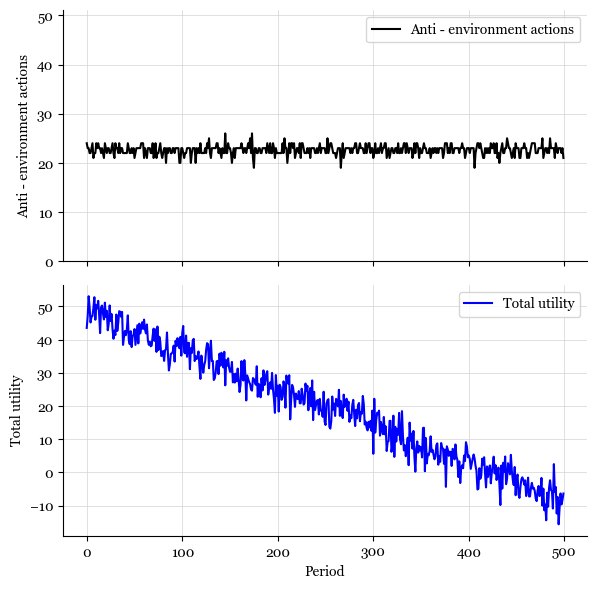

In [5]:
# Set the figure size for better visibility
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Use Seaborn to plot the time series
sns.lineplot(data=df_runs, x='Period', y='Anti - environment actions', label='Anti - environment actions', color = "black",ax=ax1)
sns.lineplot(data=df_runs, x='Period', y='Total utility', label='Total utility', color = "blue",ax = ax2)

ax1.set_ylim(0, 51)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()

In [6]:
# Incremental tax
incremental_model = SimpleModel(50, tax = 0.1, tax_type = "incremental")
choices_history = []
utility_history = []
for i in range(500):
    incremental_model.step()
    choices = []
    utilities = []
    for a in incremental_model.schedule.agents:
        utilities.append(a.utility)
        choices.append(a.choice)
    choices_history.append(choices.count("Anti - environment action")) 
    utility_history.append(sum(utilities))

# Store in a dataframe
df_incremental_runs = pd.DataFrame({"Period":np.arange(0,500),
                        "Anti - environment actions":choices_history,
                        "Total utility":utility_history})
    

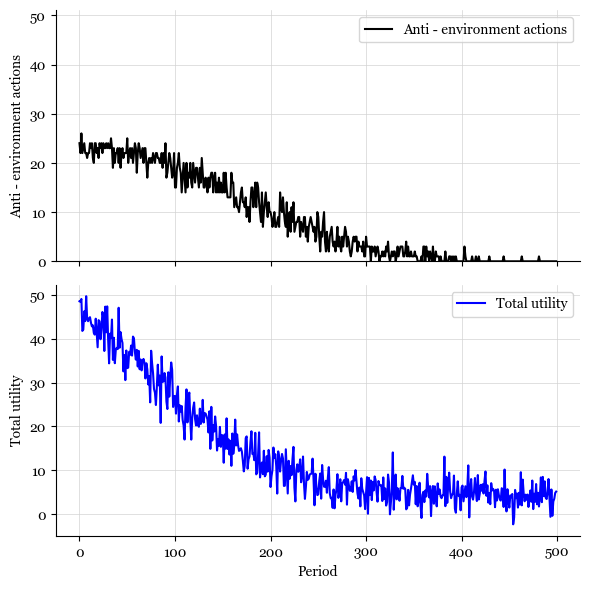

In [7]:
# Set the figure size for better visibility
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Use Seaborn to plot the time series
sns.lineplot(data=df_incremental_runs, x='Period', y='Anti - environment actions', label='Anti - environment actions', color = "black", ax=ax1)
sns.lineplot(data=df_incremental_runs, x='Period', y='Total utility', label='Total utility', color = "blue", ax = ax2)

ax1.set_ylim(0, 51)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()

Now, what if they were playing a prisoner's dilemma?

In [8]:
from prisoner_dilemma_model import PD_Agent, PD_Model, tit_for_tat_Agent, tit_for_tat_Model, PD_learning_Agent, PD_learning_Model

In [9]:
pd_model = PD_Model(50, tax = 0)
choices_history = []
utility_history = []
for i in range(500):
    pd_model.step()
    choices = []
    utilities = []
    for a in pd_model.schedule.agents:
        utilities.append(a.utility)
        choices.append(a.choice)
    choices_history.append(choices.count("Anti - environment action")) 
    utility_history.append(sum(utilities))

# Store in a dataframe
df_pd_runs = pd.DataFrame({"Period":np.arange(0,500),
                        "Anti - environment actions":choices_history,
                        "Total utility":utility_history})
    

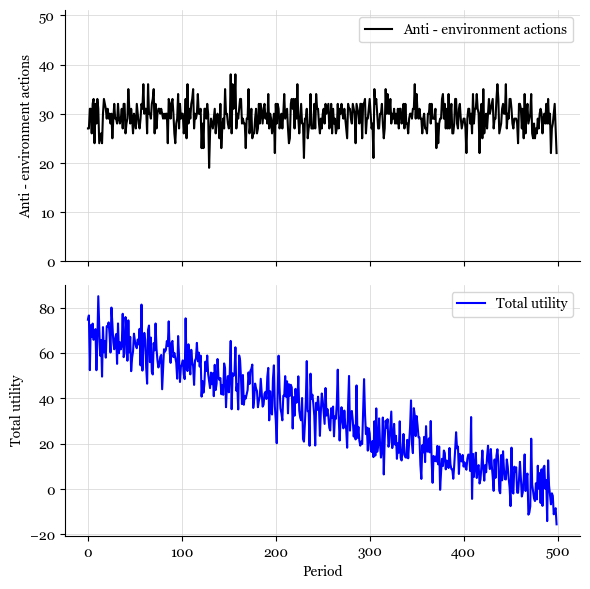

In [10]:
# Set the figure size for better visibility
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Use Seaborn to plot the time series
sns.lineplot(data=df_pd_runs, x='Period', y='Anti - environment actions', label='Anti - environment actions', color = "black",ax=ax1)
sns.lineplot(data=df_pd_runs, x='Period', y='Total utility', label='Total utility', color = "blue",ax = ax2)

ax1.set_ylim(0, 51)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()

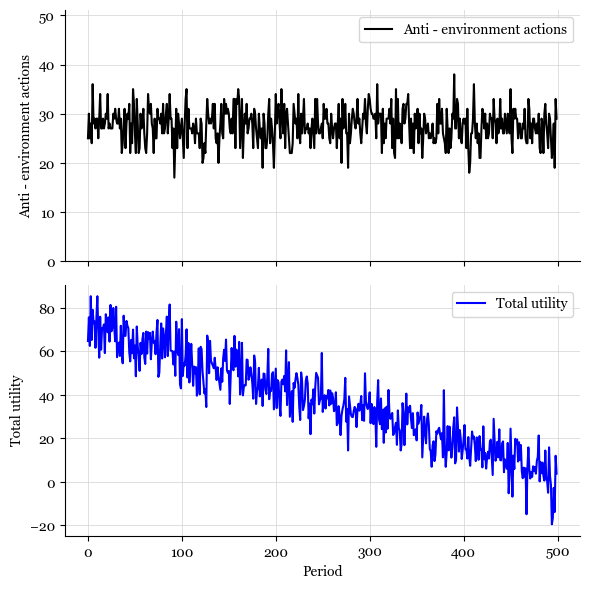

In [11]:
tit_for_tat_model = tit_for_tat_Model(50, tax = 0)
choices_history = []
utility_history = []
for i in range(500):
    tit_for_tat_model.step()
    choices = []
    utilities = []
    for a in tit_for_tat_model.schedule.agents:
        utilities.append(a.utility)
        choices.append(a.choice)
    choices_history.append(choices.count("Anti - environment action")) 
    utility_history.append(sum(utilities))

# Store in a dataframe
df_tit_for_tat_runs = pd.DataFrame({"Period":np.arange(0,500),
                        "Anti - environment actions":choices_history,
                        "Total utility":utility_history})

# Set the figure size for better visibility
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Use Seaborn to plot the time series
sns.lineplot(data=df_tit_for_tat_runs, x='Period', y='Anti - environment actions', label='Anti - environment actions', color = "black",ax=ax1)
sns.lineplot(data=df_tit_for_tat_runs, x='Period', y='Total utility', label='Total utility', color = "blue",ax = ax2)

ax1.set_ylim(0, 51)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()

In [12]:
pd_learning_model = PD_learning_Model(50, tax = 0)
choices_history = []
utility_history = []
for i in range(500):
    pd_learning_model.step()
    choices = []
    utilities = []
    for a in pd_learning_model.schedule.agents:
        utilities.append(a.utility)
        choices.append(a.choice)
    choices_history.append(choices.count("Anti - environment action")) 
    utility_history.append(sum(utilities))

# Store in a dataframe
df_pd_learning_runs = pd.DataFrame({"Period":np.arange(0,500),
                        "Anti - environment actions":choices_history,
                        "Total utility":utility_history})
    

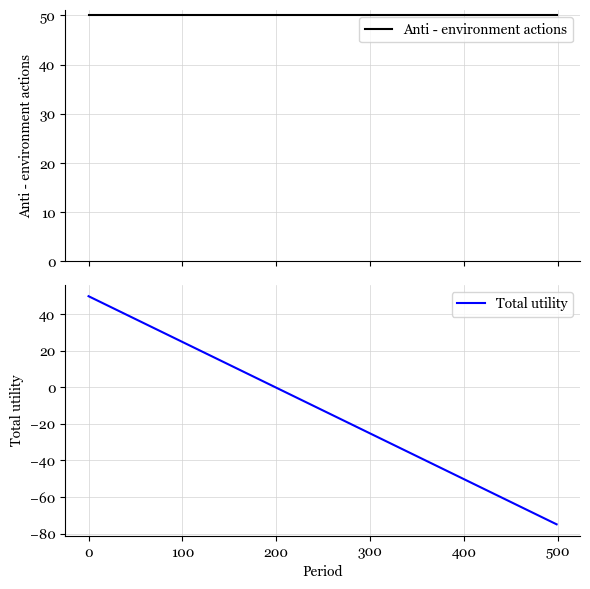

In [13]:
# Set the figure size for better visibility
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Use Seaborn to plot the time series
sns.lineplot(data=df_pd_learning_runs, x='Period', y='Anti - environment actions', label='Anti - environment actions', color = "black",ax=ax1)
sns.lineplot(data=df_pd_learning_runs, x='Period', y='Total utility', label='Total utility', color = "blue",ax = ax2)

ax1.set_ylim(0, 51)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()

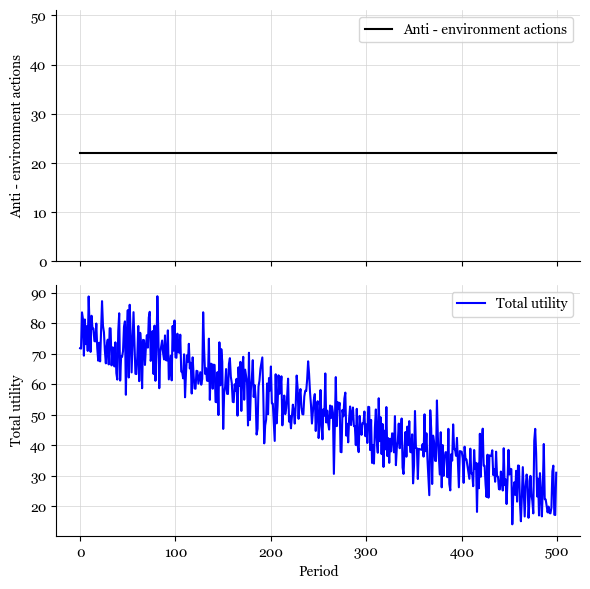

In [14]:
pd_learning_model = PD_learning_Model(50, tax = 0, learn_type="complete_information", theta = 1)
choices_history = []
utility_history = []
for i in range(500):
    pd_learning_model.step()
    choices = []
    utilities = []
    for a in pd_learning_model.schedule.agents:
        utilities.append(a.utility)
        choices.append(a.choice)
    choices_history.append(choices.count("Anti - environment action")) 
    utility_history.append(sum(utilities))

# Store in a dataframe
df_pd_learning_runs = pd.DataFrame({"Period":np.arange(0,500),
                        "Anti - environment actions":choices_history,
                        "Total utility":utility_history})

# Set the figure size for better visibility
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Use Seaborn to plot the time series
sns.lineplot(data=df_pd_learning_runs, x='Period', y='Anti - environment actions', label='Anti - environment actions', color = "black",ax=ax1)
sns.lineplot(data=df_pd_learning_runs, x='Period', y='Total utility', label='Total utility', color = "blue",ax = ax2)

ax1.set_ylim(0, 51)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()



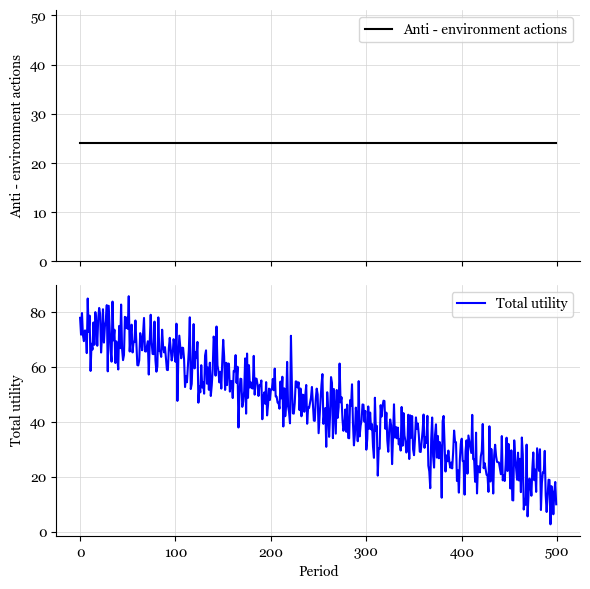

In [16]:
pd_learning_model = PD_learning_Model(50, tax = 0, learn_type="no information", theta = 1)
choices_history = []
utility_history = []
for i in range(500):
    pd_learning_model.step()
    choices = []
    utilities = []
    for a in pd_learning_model.schedule.agents:
        utilities.append(a.utility)
        choices.append(a.choice)
    choices_history.append(choices.count("Anti - environment action")) 
    utility_history.append(sum(utilities))

# Store in a dataframe
df_pd_learning_runs = pd.DataFrame({"Period":np.arange(0,500),
                        "Anti - environment actions":choices_history,
                        "Total utility":utility_history})

# Set the figure size for better visibility
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# Use Seaborn to plot the time series
sns.lineplot(data=df_pd_learning_runs, x='Period', y='Anti - environment actions', label='Anti - environment actions', color = "black",ax=ax1)
sns.lineplot(data=df_pd_learning_runs, x='Period', y='Total utility', label='Total utility', color = "blue",ax = ax2)

ax1.set_ylim(0, 51)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

plt.tight_layout()

In [18]:
## Try to understand this last result
histories_each_agent =dict(zip([i.unique_id for i in pd_learning_model.schedule.agents], [i.history for i in pd_learning_model.schedule.agents]))

In [21]:
len(histories_each_agent[1])

501

In [22]:
df_pd_learning_runs

,Period,Anti - environment actions,Total utility
0,0,24,77.8281
1,1,24,71.7078
2,2,24,79.5825
3,3,24,71.4682
4,4,24,69.3472
...,...,...,...
495,495,24,14.4176
496,496,24,6.3117
497,497,24,14.1847
498,498,24,18.0720
